# vis iris contour gen

In [1]:
import sys
import warnings
import numpy as np

In [2]:
def load_modules():
    sys.path.append("../../../")
    warnings.filterwarnings("ignore")
    %run ../../../ds/icontour/npz/gen.py
    %run ../../../ds/icontour/model/item.py
    %run ../../../ac/visualizer/plotter.py
    
load_modules()

Using TensorFlow backend.


In [3]:
# npz_dir_path = "/home/chy/archive-data/bench/samples/ic/"
# # npz_dir_path = "/home/chy/archive-data/processed/iris-contour-npz/total/"
# igen = IrisContourGenerator(npz_dir_path, batch_size=1, use_aug=False)

# visualize (unity-ellipse)

In [5]:
def vis(x, y, draw_ellipse=True, is_full=False):
    height = x.shape[0]
    ax = show_image(bgr_to_rgb(x), fig_size=(3, 3))
    
    if draw_ellipse and is_full:
        xc, yc, w, h, phi = y[0]
        print(xc, yc, w, h, phi)
        draw_point(ax, xc, height-yc)
        ax.add_patch(make_ellipse((xc, height-yc), 2*w, 2*h, phi=-phi))
    elif draw_ellipse:
        xc, yc= y[0]
        print(xc, yc)
        draw_point(ax, xc, height-yc)

*** meta verify complete [Unknown] ***


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19.1616854334395 59.27013498084909
73.06168527156711 55.77934795278302
96.18398282953419 38.10191162423383
18.11339801549412 89.22032157672835
35.62805486119529 15.813784964539927
86.43774518407821 14.753955165529526
21.170950803382702 68.3316646894454
100.48108409155412 10.364679120864757
61.36296156982403 48.781953070194135
99.2972409461519 51.14152906552338


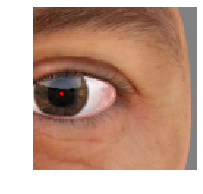

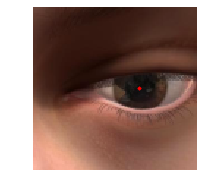

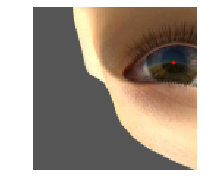

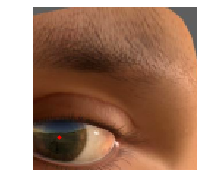

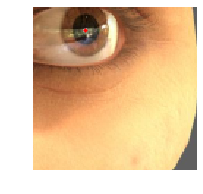

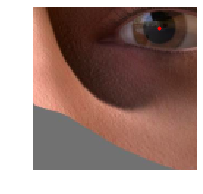

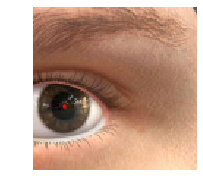

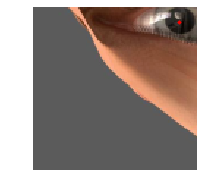

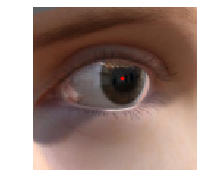

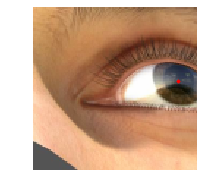

In [7]:
npz_dir_path = "/home/chy/archive-data/processed/iris-contour-npz/unity-partial"

igen = IrisContourGenerator(npz_base_path=npz_dir_path, 
                            batch_size=1, 
                            purpose=Purpose.TRAIN,
                            is_ellipse_mode=True,
                            use_aug=False)

for i in range(0, 10):
    x, y = igen[i]
    vis(x, y)

# visualize

In [6]:
def vis(x, y, draw_ellipse=True):
    height = x.shape[0]
    ax = show_image(bgr_to_rgb(x), fig_size=(3, 3))
    
    if draw_ellipse:
        xc, yc, w, h, phi = y[0]
        draw_point(ax, xc, height-yc)
        ax.add_patch(make_ellipse((xc, height-yc), 2*w, 2*h, phi=-phi))

*** meta verify complete [Unknown] ***


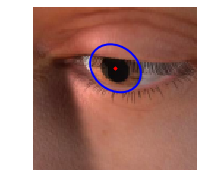

In [10]:
npz_dir_path = "/home/chy/archive-data/bench/samples/ic/"
igen = IrisContourGenerator(npz_dir_path, batch_size=1, use_aug=False)

for i in range(335, 336):
    x, y = igen[i]
    vis(x, y)

# Vis : VC-ONE

In [20]:
npz_path = "/home/chy/archive-data/processed/iris-contour-npz/vc-partial"

igen = IrisContourGenerator(npz_base_path=npz_path, 
                            batch_size=1, 
                            is_item_mode=True,
                            is_ellipse_mode=True, 
                            use_aug=False)

*** meta verify complete [Unknown] ***


center: [377.3196725  530.72162864] w: 15.088804875481586 h: 15.088804875481586 phi: 0
center: [540.23831872 514.01601049] w: 15.034652136120476 h: 15.034652136120476 phi: 0


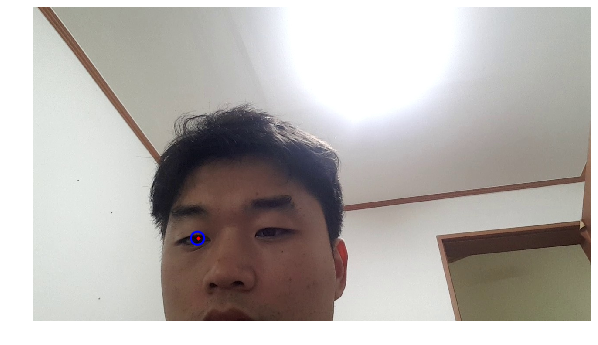

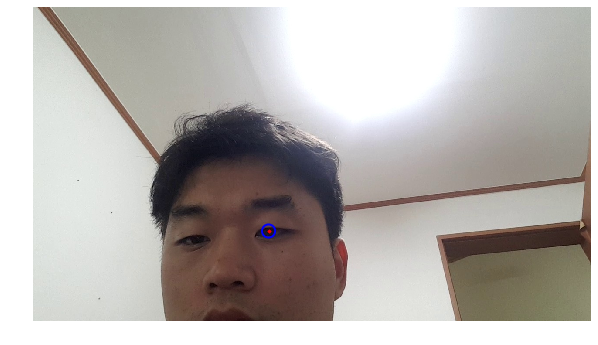

In [34]:
for i in range(500, 502):
    item = igen[i][0]
    
    print(item)       # crop 하기전 전체 이미지상에서 홍채 중심 좌표 및 타원 방정식 계수
    x = bgr_to_rgb(item.get_decoded_frame())
    ax = show_image(x)
    
    height = x.shape[0]
    (xc, yc), w, h, phi = item.ellipse_param
    draw_point(ax, xc, height-yc)
    ax.add_patch(make_ellipse((xc, height-yc), 2*w, 2*h, phi=-phi))

# Vis : class map mode 

In [8]:
npz_path = "/media/chy/1326657F605F16F2/processed/iris-contour-npz/"
npz_path = "/home/chy/archive-data/processed/iris-contour-npz/vc"
npz_path = "/home/chy/archive-data/processed/iris-contour-npz/vc-partial"

igen = IrisContourGenerator(npz_base_path=npz_path, 
                            batch_size=1, 
                            is_item_mode=False,
                            is_ellipse_mode=False, 
                            use_aug=False)

*** meta verify complete [Unknown] ***


In [35]:
# for i in range(1000, 1010):
#     x, y = igen[i]
    
#     # item.plot()
#     # cv2.imwrite("/home/chy/바탕화면/iris-image/x{}.jpg".format(i), x*255)
#     # cv2.imwrite("/home/chy/바탕화면/iris-image/y{}.jpg".format(i), y[0]*255)
#     show_image(bgr_to_rgb(x), fig_size=(3,3))
#     # show_image(y[0], fig_size=(3,3))
#     class_map = y[0]
#     class_map = np.argmax(class_map, axis=-1)
#     class_map = np.reshape(class_map, (112, 112 ,1))
#     show_image(class_map, fig_size=(3,3))